In [ ]:
!pip install sklearn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x

import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

from sklearn.metrics import confusion_matrix

from numpy.random import seed
from numpy.random import randn

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


          X_axis    Y_axis  Color
200001  0.988716  0.003250      2
200002 -0.189668  0.004209      2
200003  0.120600 -0.160778      0
200004 -0.325471 -0.217165      2
200005  0.439270  0.139499      0
...          ...       ...    ...
299995 -0.358764 -0.251218      2
299996  0.754828 -0.449390      2
299997  0.096043 -0.205127      0
299998 -0.796261 -0.654774      1
299999 -0.184390 -0.417251      2

[99999 rows x 3 columns]


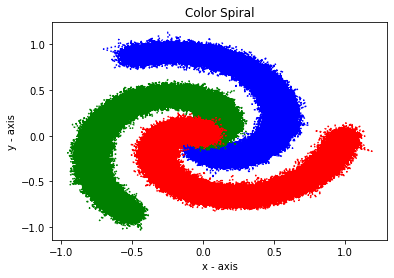

In [ ]:
rng=100000
noise_mean=0.0
noise_var=0.05

A=[]
A=[0.0 for i in range(rng)]

B=[]
B=[0.0 for i in range(rng)]

C=[]
C=[0.0 for i in range(rng)]

Xa=[]
Xa=[0.0 for i in range(rng)]

Xb=[]
Xb=[0.0 for i in range(rng)]

Xc=[]
Xc=[0.0 for i in range(rng)]

CoA=[]
CoA=[0 for i in range(rng)]

CoB=[]
CoB=[1 for i in range(rng)]

CoC=[]
CoC=[2 for i in range(rng)]


x1=0.0
x2=0
while x1<=1 and x2<rng:
  Xa[x2]=x1*(math.cos((2*3.14/3)*(2*x1-1))) + np.random.normal(noise_mean,noise_var)
  A[x2]=x1*(math.sin((2*3.14/3)*(2*x1-1))) + np.random.normal(noise_mean, noise_var)
  x1+=(1.0/rng)
  x2+=1

y1=0.0
y2=0
while y1<=1 and y2<rng:
  Xb[y2]=y1*(math.cos((2*3.14/3)*(2*y1))) + np.random.normal(noise_mean, noise_var)
  B[y2]=y1*(math.sin((2*3.14/3)*(2*y1))) + np.random.normal(noise_mean, noise_var)
  y1+=(1.0/rng)
  y2+=1


z1=0.0
z2=0
while z1<=1 and z2<rng:
  Xc[z2]=z1*(math.cos((2*3.14/3)*(2*z1+1))) + np.random.normal(noise_mean, noise_var)
  C[z2]=z1*(math.sin((2*3.14/3)*(2*z1+1)))+ np.random.normal(noise_mean, noise_var)
  z1+=(1.0/rng)
  z2+=1

dfA=pd.DataFrame({'X_axis':Xa, 'Y_axis':A, 'Color':CoA})
dfB=pd.DataFrame({'X_axis':Xb, 'Y_axis':B, 'Color':CoB})
dfC=pd.DataFrame({'X_axis':Xc, 'Y_axis':C, 'Color':CoC})
df=pd.concat([dfA, dfB, dfC])
df = df.sample(frac=1).reset_index(drop=True)
pf1=df[1:200000]
pf2=df[200001:300000]
pf1.to_csv('./Spiral_train.csv')
pf2.to_csv('./Spiral_test.csv')

print(pf2)

plt.plot(Xa, A, linestyle='dotted', color='blue')
plt.plot(Xb, B, linestyle='dotted', color='green')
plt.plot(Xc, C, linestyle='dotted', color='red') 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Color Spiral') 
  
# function to show the plot 
plt.show() 

In [ ]:
CSV_COLUMN_NAMES = ['X_axis', 'Y_axis', 'Color']
COLOR = [0, 1, 2]

train = pd.read_csv('Spiral_train.csv', names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv('Spiral_test.csv', names=CSV_COLUMN_NAMES, header=0)
train_y = train.pop('Color')
test_y = test.pop('Color')
train.head()
print (train.shape, train.columns.tolist())

X=train.values
print (X.shape, type(X))
y=train_y.values


(199999, 2) ['X_axis', 'Y_axis']
(199999, 2) <class 'numpy.ndarray'>


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model summary
print (model.summary())#; input("enter")

# fit the keras model on the dataset
his=model.fit(X, y, epochs=100, batch_size=32, verbose=1, shuffle=True, validation_split=0.2)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

predictions = model.predict(X)
predictions_class=np.argmax(predictions, axis=-1)

print(predictions_class.shape)
matrix = confusion_matrix(predictions_class, y)
print(matrix)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3324 - val_loss: 0.0000e+00 - val_accuracy: 0.3313
Epoch 2/2
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3328
Accuracy: 33.28
(199999,)
[[66799 66554 66646]
 [    0     0     0]
 [    0     0     0]]


**Training statistics**

   train_loss  train_accuracy  val_loss  val_accuracy  Epochs
0         0.0        0.333133       0.0      0.331325       0
1         0.0        0.333133       0.0      0.331325       1 (2, 5)


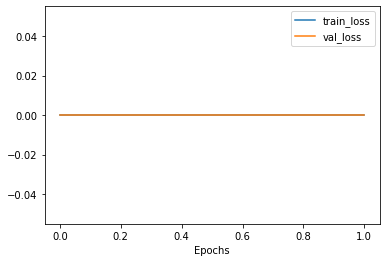

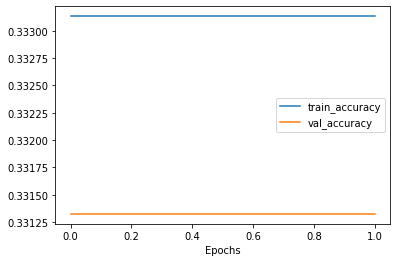

In [ ]:
dfVal=pd.DataFrame()
dfVal["train_loss"]=his.history["loss"]
dfVal["train_accuracy"]=his.history["accuracy"]
dfVal["val_loss"]=his.history["val_loss"]
dfVal["val_accuracy"]=his.history["val_accuracy"]
dfVal["Epochs"]=[i for i in range(dfVal.shape[0])]
print (dfVal.head(10), dfVal.shape)
dfVal.plot(x="Epochs", y=["train_loss", "val_loss"])
dfVal.plot(x="Epochs", y=["train_accuracy", "val_accuracy"])

In [ ]:
from keras import backend as K

**Output Tensor from each layer**

In [ ]:
## output of each layer
def outputEachLayer(model):
  inp = model.input  
  input_shape=(2,)
  print (inp, type(inp), input_shape)#; input("enter")                                         # input placeholder
  outputs = [layer.output for layer in model.layers]          # all layer outputs
  functor = K.function(inp, outputs)#[inp, K.learning_phase()], outputs) 
  ###For a given test case we can get output tensor from each layer. Replace test variable with the desired value
  # Testing
  test = np.random.random(input_shape)[np.newaxis,...]; print (test.shape)#; input("enter")
  layer_outs = functor(test)#[test, 1.])
  print("layers shape\n", [x.shape for x in layer_outs], "\n")
  print("layers value\n", [x for x in layer_outs], "\n")
  return layer_outs
	
layer_outs=outputEachLayer(model)
#print ([x.shape for x in layer_outs])
#print ([x for x in layer_outs])

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense_21_input'), name='dense_21_input', description="created by layer 'dense_21_input'") <class 'tensorflow.python.keras.engine.keras_tensor.KerasTensor'> (2,)
(1, 2)
layers shape
 [(1, 4), (1, 2), (1, 1)] 

layers value
 [array([[0., 0., 0., 0.]], dtype=float32), array([[0.03273788, 0.03459849]], dtype=float32), array([[1.]], dtype=float32)] 



In [ ]:
X_test=test.values
y_test=test_y.values

#Evaluate the test accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# make probability predictions with the model
predictions = model.predict(X_test)#; input("enter")
predictions_class=np.argmax(predictions, axis=-1)

matrix = confusion_matrix(predictions_class, y_test)
print(matrix)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

3125/3125 [==============================] - 5s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3345
Accuracy: 33.45
[[33201 33445 33353]
 [    0     0     0]
 [    0     0     0]]
[0.9887156335828136, 0.0032499118009183536] => 1 (expected 2)
[-0.18966804690046635, 0.004209195720548474] => 1 (expected 2)
[0.1205995740152771, -0.16077806162213013] => 1 (expected 0)
[-0.3254705425326557, -0.2171653702317484] => 1 (expected 2)
[0.4392698605452732, 0.1394993317896652] => 1 (expected 0)
